In [ ]:
import pandas
! pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
dataset = pd.read_csv('dirty_cafe_sales.csv')
dataset.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [3]:
dataset.shape

(10000, 8)

In [4]:
dataset.isnull()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,True,False,False
9996,False,True,False,True,False,False,True,False
9997,False,False,False,False,False,False,True,False
9998,False,False,False,True,False,False,True,False


In [5]:
dataset.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [6]:
( dataset.isnull().sum() / dataset.shape[0] ) * 100

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

In [7]:
dataset.isnull().sum().sum()

np.int64(6826)

In [8]:
( dataset.isnull().sum().sum() / ( dataset.shape[0] * dataset.shape[1] ) ) * 100

np.float64(8.5325)

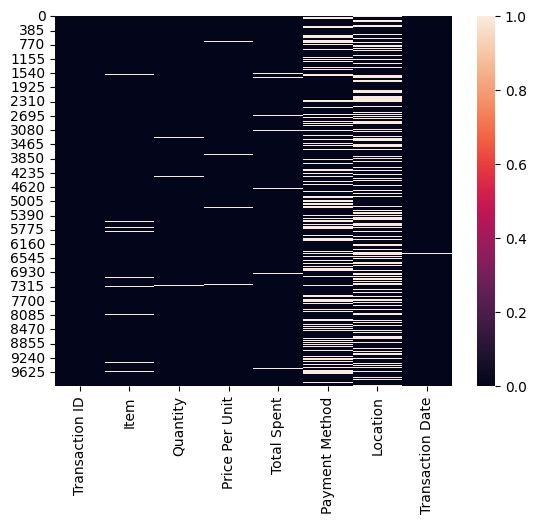

In [11]:
sns.heatmap(dataset.isnull())
plt.show()

# DROPPING

In [ ]:
# if Null value > 50% then drop the columns
# dataset.drop(columns=["Location"], inplace=True)
# if delete any row which contains any NA or Null value then delete the row
# dataset.dropna(inplace=True)

# Imputing Category Data

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
# if fill same data in any box (x,y) then
# It fill 10 at all position which is Null or Na
# dataset.fillna(10)

In [ ]:
# if method = bfill then it just copy the next data and past ex: if data[1][1] = 10 and data[0][1] = Na then after bfill the data[0][1] becomes 10 and if axis is 1 then it copy the left value and past it and if axis is 0 (default) then it just copy the columns and past upper one and vise versa
# and ffill for forward filling
# dataset.fillna(method='bfill', axis=1)

In [17]:
# mod filling
dataset["Quantity"].mode()[0]

'5'

In [18]:
dataset["Quantity"].fillna(dataset["Quantity"].mode()[0], inplace=True)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          10000 non-null  object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [27]:
dataset.select_dtypes(include="object").columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [28]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_7204\1185376536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


# Handling Missing Values using Scikit-Learn

In [ ]:
# if int64 or int is present then used otherwise read (used in pipeline )
# from sklearn.impute import SimpleImputer
# si = SimpleImputer(strategy="mean")
# ar = si.fit_transform(dataset[[]])

# One hot encoding & Dummy Values

In [86]:
# Apply only for small choice of columns like Gender or Marriage
# 2 method one is sklearn OneHotEncoder or pd.get_dummies()

dataset1 = pd.read_csv("insurance.csv")
dataset1.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [ ]:
dataset1.info()

In [36]:
dataset1.shape

(1338, 7)

In [ ]:
en_data = dataset1[["sex"]]
pd.get_dummies(en_data).info()

In [38]:
en_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


In [40]:
from sklearn.preprocessing import OneHotEncoder


In [50]:
ohe = OneHotEncoder(drop = "first")
ar = ohe.fit_transform(en_data).toarray()

In [ ]:
ar

In [52]:
pdar = pd.DataFrame(ar, columns=[ "sex_male"])

In [ ]:
pdar.head(10)

In [6]:
dataset["Payment Method"].fillna(dataset["Payment Method"].mode()[0], inplace=True)

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\414677012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Payment Method"].fillna(dataset["Payment Method"].mode()[0], inplace=True)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    10000 non-null  object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


# Label Encoding
- Label Encoding is a technique to convert categorical text data (like "Male", "Female", "Other") into numerical values (like 0, 1, 2).
- It is used in Machine Learning preprocessing because ML models usually work with numbers, not strings.

In [10]:
dataset.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Payment Method'] = le.fit_transform(dataset['Payment Method'])

In [13]:
dataset['Payment Method'].unique()

array([1, 0, 4, 2, 3])

# Ordinal Encoding

- Definition: A technique to convert categorical values into integers while preserving their natural order.
- When to use: When categories have a ranking or hierarchy (like education levels, sizes, ratings).

In [18]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
dataset1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
data_set1 = [['southwest', 'southeast', 'northwest', 'northeast']]

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=data_set1)
oe.fit(dataset1[['region']])

,categories,"[['southwest', 'southeast', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [28]:
dataset1['region_or'] = oe.transform(dataset1[['region']])

In [29]:
dataset1[['region_or', 'region']]

,region_or,region
0,0.0,southwest
1,1.0,southeast
2,1.0,southeast
3,2.0,northwest
4,2.0,northwest
...,...,...
1333,2.0,northwest
1334,3.0,northeast
1335,1.0,southeast
1336,0.0,southwest


In [30]:
# By using map function
dataset2 = {'southwest': 10, 'southeast': 11, 'northwest': 12, 'northeast': 13}
dataset1["region_or_map"] = dataset1['region'].map(dataset2)

In [31]:
dataset1

,age,sex,bmi,children,smoker,region,charges,region_or,region_or_map
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,10
1,18,male,33.770,1,no,southeast,1725.55230,1.0,11
2,28,male,33.000,3,no,southeast,4449.46200,1.0,11
3,33,male,22.705,0,no,northwest,21984.47061,2.0,12
4,32,male,28.880,0,no,northwest,3866.85520,2.0,12
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,2.0,12
1334,18,female,31.920,0,no,northeast,2205.98080,3.0,13
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,11
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,10


# Outlier
- An outlier is a data point that is significantly different from other observations in a dataset.
- It lies far away from the overall pattern of the data.
- Outliers can skew results, mislead models, or sometimes reveal interesting insights (fraud, rare events).

---------------
*🔹 Types of Outliers*

- Univariate outliers → unusual values in a single variable.
- Multivariate outliers → unusual combinations across multiple variables.

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    10000 non-null  int64 
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [34]:
dataset.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,1,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,0,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,1,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,4,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,2,In-store,2023-06-11


In [37]:
dataset1.describe(include="all")

,age,sex,bmi,children,smoker,region,charges,region_or,region_or_map
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN,NaN,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265,1.484305,11.484305
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237,1.104885,1.104885
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,0.000000,10.000000
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150,1.000000,11.000000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000,1.000000,11.000000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515,2.000000,12.000000


In [38]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   region_or      1338 non-null   float64
 8   region_or_map  1338 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 94.2+ KB


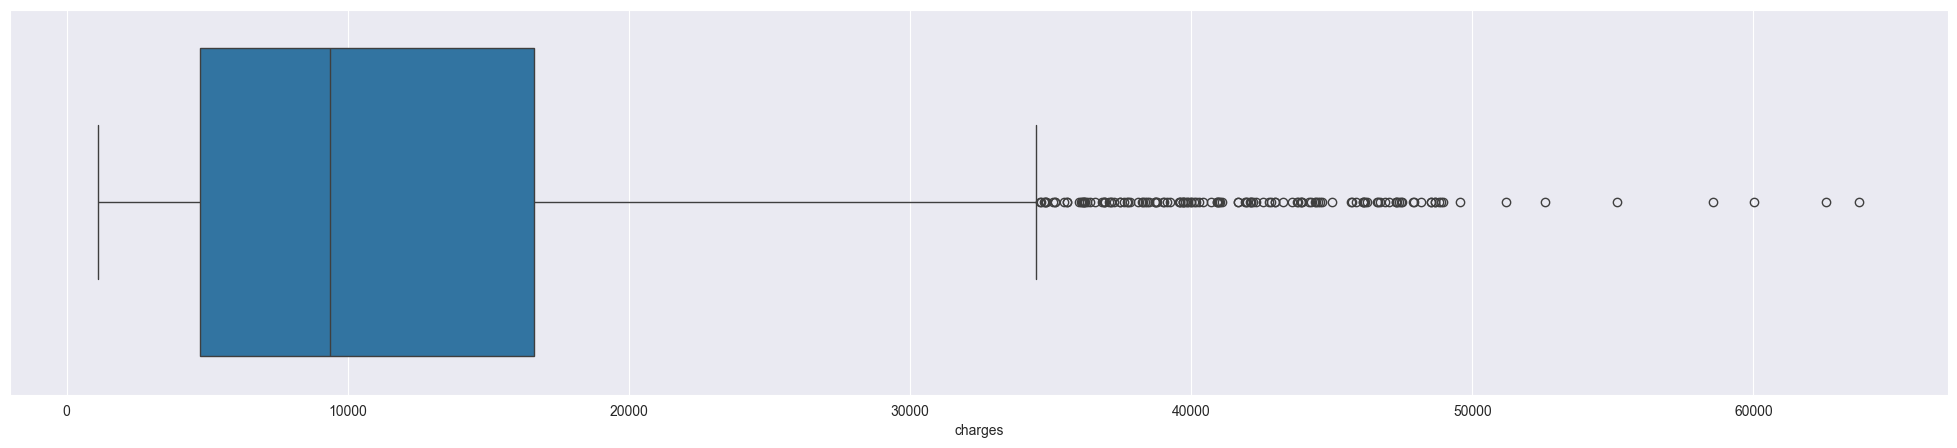

In [57]:
plt.figure(figsize = (25,5))
sns.boxplot( x= "charges", data=dataset1)
plt.show()

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\1811390331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1["charges"])


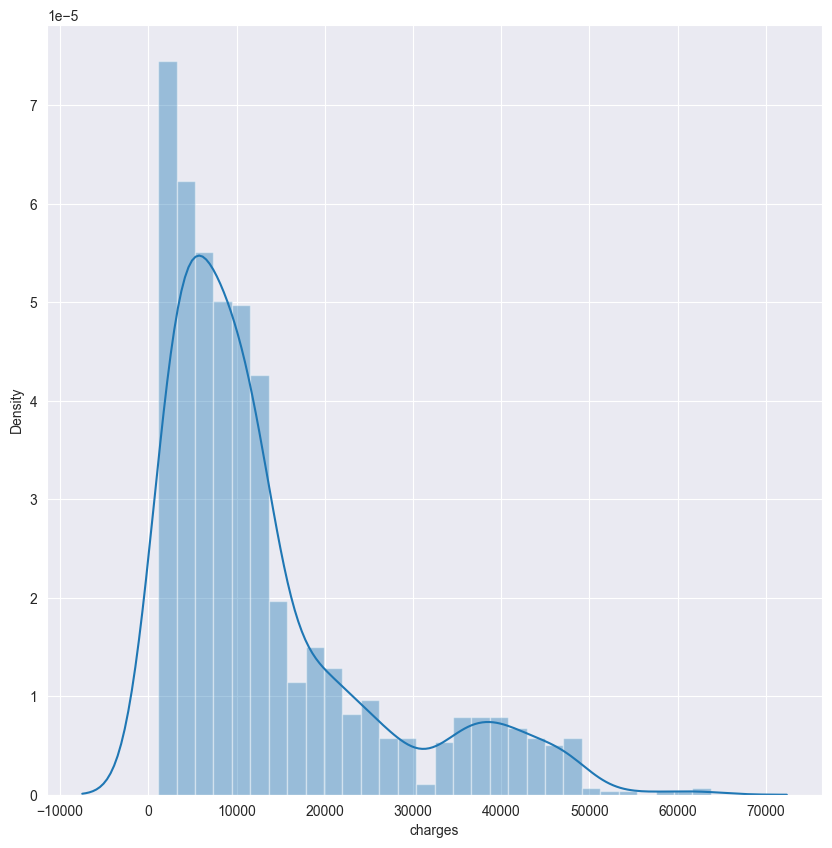

In [52]:
plt.figure(figsize = (10,10))
sns.distplot(dataset1["charges"])
plt.show()

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\1303809889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1["bmi"])


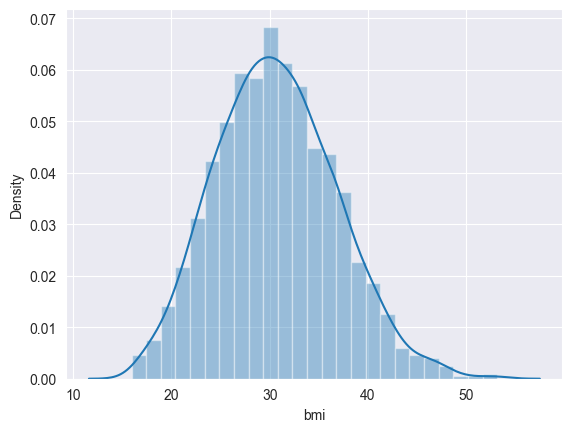

In [44]:
sns.distplot(dataset1["bmi"])
plt.show()

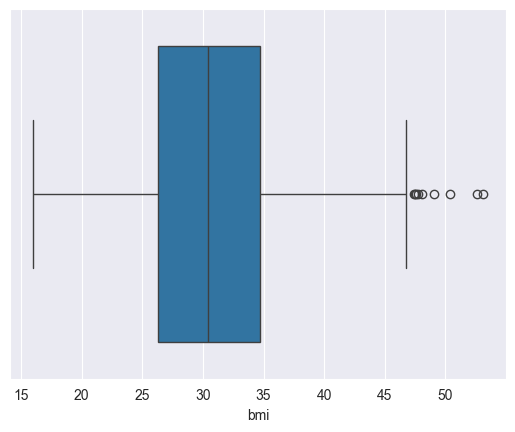

In [46]:
sns.boxplot(x="bmi", data=dataset1)
plt.show()

# IQR Method:

- Definition of IQR

IQR (Interquartile Range) = Difference between the third quartile (Q3) and first quartile (Q1).

IQR=Q3−Q1

Q1 (25th percentile): 25% of the data lies below this value.

Q3 (75th percentile): 75% of the data lies below this value.

So, the IQR measures the spread of the middle 50% of the data.
```
IQR = Q3 - Q1
Lower Bound = Q1 - 1.5*IQR // min
Upper Bound = Q3 + 1.5*IQR // Max
Any value outside = Outlier
```

- Example
Suppose we have exam scores:
```
[10, 12, 14, 15, 18, 19, 21, 25, 30, 100]
```

Q1 = 14
Q3 = 25
IQR = 25 - 14 = 11

Bounds:

Lower = 14 - (1.5 × 11) = -2.5
Upper = 25 + (1.5 × 11) = 41.5

- Outlier = *100* (since it’s > 41.5)

In [47]:
q1 = dataset1['charges'].quantile(0.25)
q3 = dataset1['charges'].quantile(0.75)

In [48]:
IQR = q3 - q1

In [49]:
min_range = q1 - 1.5 * IQR

In [50]:
max_range = q3 + 1.5 * IQR

In [51]:
min_range, max_range

(np.float64(-13109.1508975), np.float64(34489.350562499996))

In [58]:
new_dataset1 = dataset1[ dataset1['charges'] <= max_range]

In [59]:
new_dataset1.shape

(1199, 9)

In [60]:
dataset1.shape

(1338, 9)

<Axes: xlabel='charges'>

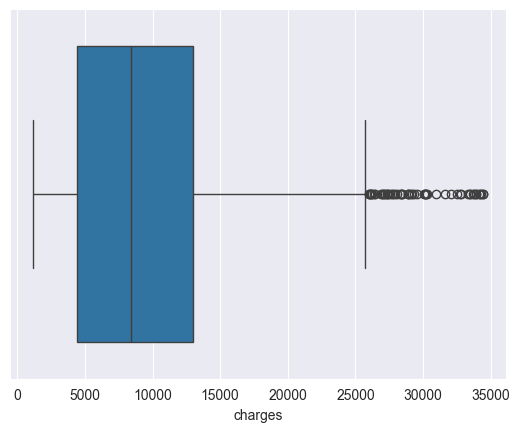

In [63]:
sns.boxplot( x= "charges", data=new_dataset1)

# Z-Score (Standard Score)
- Definition

   A Z-Score indicates how many standard deviations a data point is away from the mean of the dataset.

   Z = 0 → value is equal to the mean
   Z > 0 → value is above the mean
   Z < 0 → value is below the mean

   In outlier detection, a point is usually considered an outlier if:
     ```  |Z| > 3  ```

- Z-Score Formula

    $$
    Z = \frac{X - \mu}{\sigma}
    $$

    **Where:**
    - $X$ = data point
    - $\mu$ = mean of the dataset
    - $\sigma$ = standard deviation of the dataset

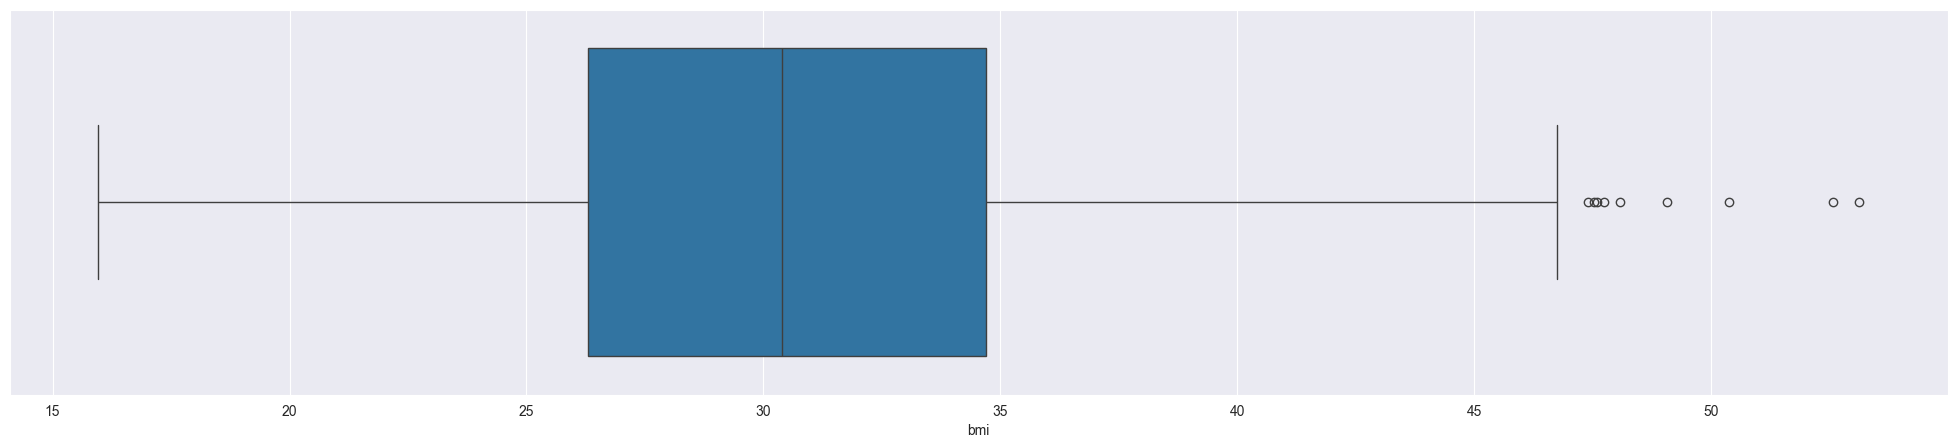

In [64]:
plt.figure(figsize = (25,5))
sns.boxplot( x= "bmi", data=dataset1)
plt.show()

In [65]:
mean = dataset1['bmi'].mean()
std = dataset1['bmi'].std()

dataset1["z_score"] = (dataset1['bmi'] - mean) / std

In [74]:
new_dataset1_Z = dataset1[ dataset1['z_score'].abs() < 3]

In [75]:
new_dataset1_Z.shape


(1334, 10)

In [76]:
dataset1.shape

(1338, 10)

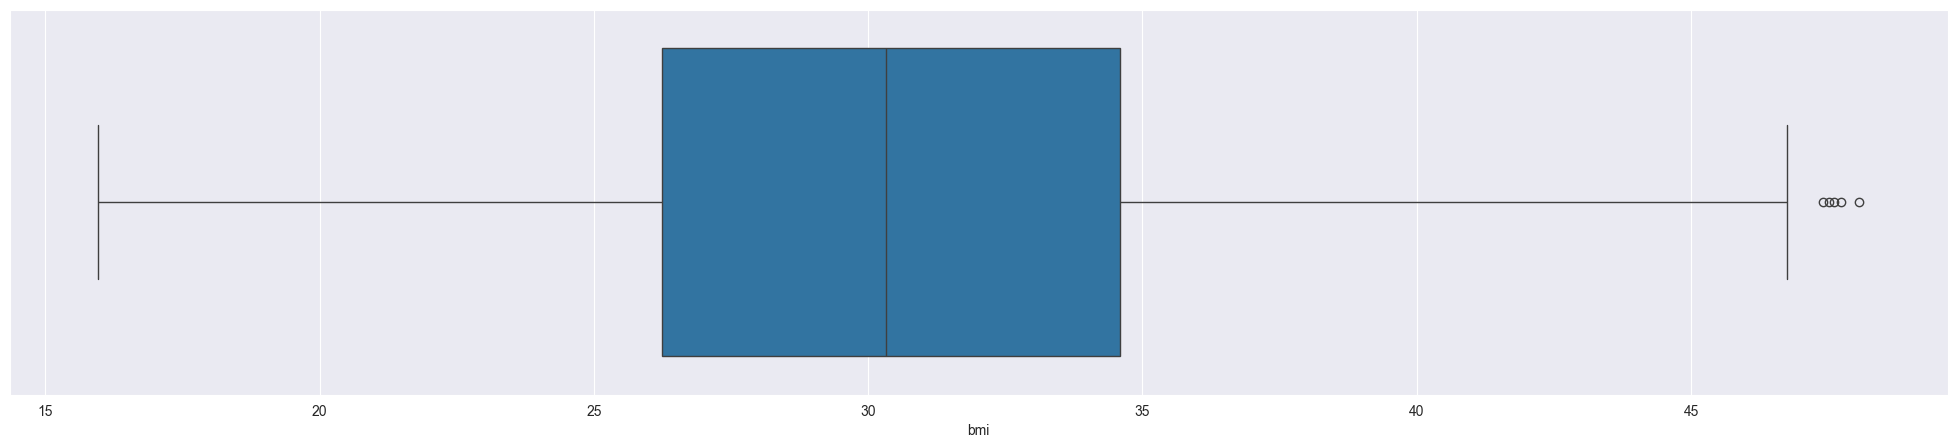

In [77]:
plt.figure(figsize = (25,5))
sns.boxplot( x= "bmi", data=new_dataset1_Z)
plt.show()

# Outlier Detection Using 3rd Standard Deviation (3-Sigma Rule)

Outliers are data points that are more than **3 standard deviations** away from the mean.

**Formula:**

$
\text{Lower Bound} = \mu - 3\sigma
$

$
\text{Upper Bound} = \mu + 3\sigma
$

Any data point \(X\) such that:

$
X < \text{Lower Bound} \quad \text{or} \quad X > \text{Upper Bound}
$

is considered an **outlier**.


In [80]:
lower_bound = dataset1['bmi'].mean() - (3 * dataset1['bmi'].std())
upper_bound = dataset1['bmi'].mean() + (3 * dataset1['bmi'].std())

lower_bound, upper_bound


(np.float64(12.368836125949507), np.float64(48.95795759602359))

In [82]:
new_dataset1_3rd = dataset1[(dataset1['bmi'] > lower_bound) & (dataset1['bmi'] < upper_bound)]

In [84]:
new_dataset1_3rd.shape

(1334, 7)

# Feature Scaling

Feature scaling is a **technique to standardize the range of independent variables** (features) in a dataset.
Many machine learning algorithms work better or converge faster when features are on a similar scale.

---

## Why Feature Scaling?

- Algorithms like **Gradient Descent**, **KNN**, **SVM**, and **PCA** are sensitive to feature magnitudes.
- Without scaling, features with larger values dominate the learning process.

---

## Common Feature Scaling Techniques

### 1️. Min-Max Scaling (Normalization)
Scales the feature to a fixed range, usually **0 to 1**.

**Formula:**

$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

**Python Example:**
```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['feature']])
```
### 2. Standardization (Z-Score Scaling)

Scales data to have **mean = 0** and **standard deviation = 1**. (mean = 0 && variance == 1)

**Formula:**

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

**Python Example:**

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['feature']])
```


In [87]:
dataset1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [91]:
# 2. Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset1[['charges']])
dataset1['charges_ss'] = pd.DataFrame( scaler.transform(dataset1[['charges']]), columns=["x"] )

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\48522160.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['charges_ss'])
D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\48522160.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['charges'])


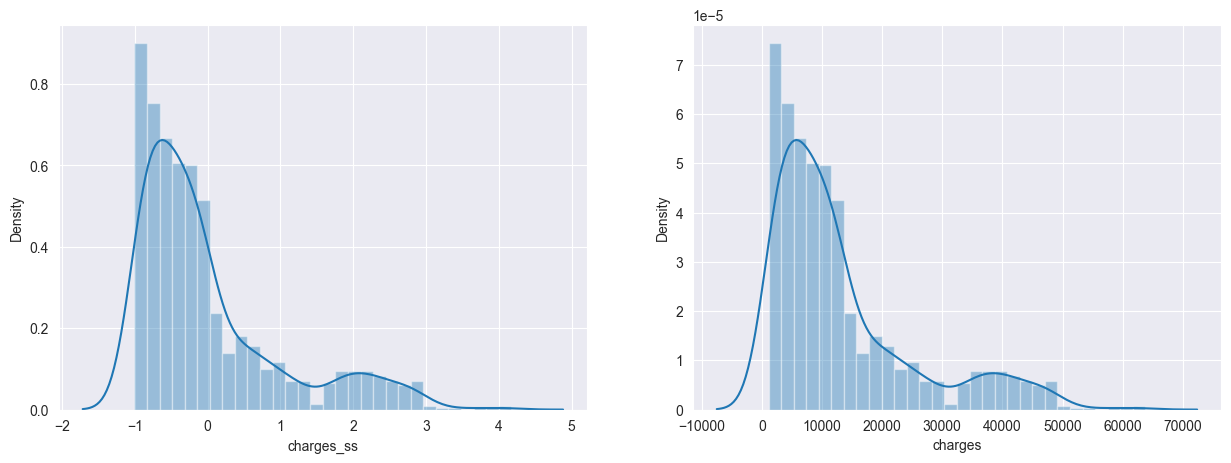

In [99]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(dataset1['charges_ss'])
plt.subplot(1,2,2)
sns.distplot(dataset1['charges'])
plt.show()

In [100]:
# 1. Min - Max Scaling
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit( dataset1[['charges']])
dataset1['charges_mm'] = pd.DataFrame( mm_scaler.transform(dataset1[['charges']]), columns=["x"] )

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\4236654088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['charges_mm'])
D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\4236654088.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['charges_ss'])
D:\Users\Dibyajyoti\Temp\Temp\

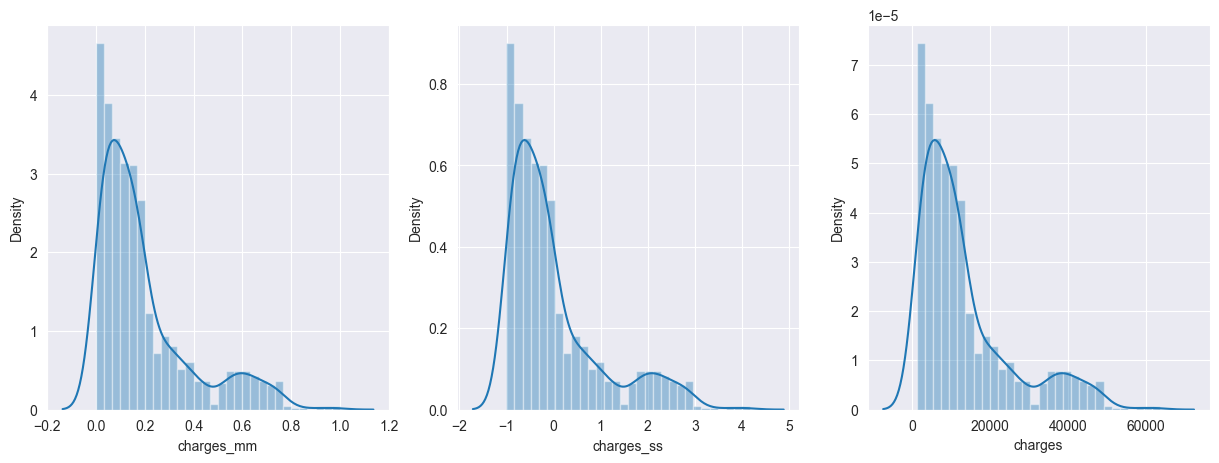

In [102]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.distplot(dataset1['charges_mm'])
plt.subplot(1,3,2)
sns.distplot(dataset1['charges_ss'])
plt.subplot(1,3,3)
sns.distplot(dataset1['charges'])
plt.show()

In [103]:
dataset1.describe(include="all")

,age,sex,bmi,children,smoker,region,charges,charges_ss,charges_mm
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000,1.338000e+03,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN,NaN,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265,-8.098488e-17,0.193916
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237,1.000374e+00,0.193301
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,-1.003557e+00,0.000000
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150,-7.046504e-01,0.057757
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000,-3.212089e-01,0.131849
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515,2.783441e-01,0.247700


### 3. Robust Scaling

Scales data using **median** and **IQR**, making it robust to outliers.

**Formula:**

$$
X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}
$$

**Python Example:**

```python
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[['feature']])
```

In [104]:
# 3. Min - Max Scaling
from sklearn.preprocessing import RobustScaler
rs_scaler = RobustScaler()
rs_scaler.fit( dataset1[['charges']])
dataset1['charges_rs'] = pd.DataFrame( mm_scaler.transform(dataset1[['charges']]), columns=["x"] )

### 4. Max Abs Scaling

Scales data by its **maximum absolute value** to be in the range **[-1, 1]**.

**Python Example:**

```python
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled_data = scaler.fit_transform(df[['feature']])
```

In [105]:
# 4. Max Abs Scaling
from sklearn.preprocessing import MaxAbsScaler
ma_scaler = MaxAbsScaler()
ma_scaler.fit( dataset1[['charges']])
dataset1['charges_ma'] = pd.DataFrame( mm_scaler.transform(dataset1[['charges']]), columns=["x"] )

# Feature Scaling Methods

| Scaling Method                 | Formula / Description                                          | Handles Outliers? | Main Property                                     | Common ML Algorithms                       |
|--------------------------------|----------------------------------------------------------------|------------|-------------------------------------------------|-------------------------------------------|
| **Min-Max Scaling (Normalization)** | $ X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}} $ |  No        | Scales features to a fixed range [0,1]         | Neural Networks, KNN, SVM                 |
| **Standardization (Z-Score Scaling)** | $ X_{\text{scaled}} = \frac{X - \mu}{\sigma} $                 | Sensitive  | Mean = 0, Std = 1; preserves outlier influence | Logistic Regression, SVM, PCA, KMeans    |
| **Robust Scaling**              | $ X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}$    |  Yes       | Uses median & IQR; robust to outliers         | Any algorithm sensitive to outliers       |
| **Max Abs Scaling**             | $ X_{\text{scaled}} = \frac{X}{\max(|X|)} $                                                              | ⚠ Sensitive    | Scales by max absolute value to [-1,1]        | Sparse data, linear models, SVM           |


D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\3864856834.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['charges_mm'])
D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\3864856834.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['charges_ss'])
D:\Users\Dibyajyoti\Temp\Temp\

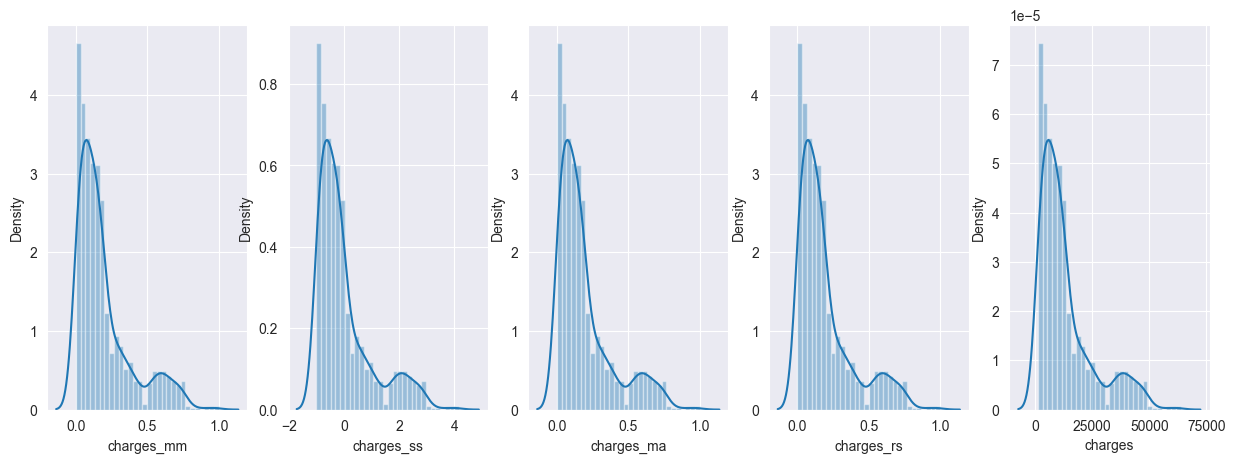

In [109]:
plt.figure(figsize = (15,5))
plt.subplot(1,5,1)
sns.distplot(dataset1['charges_mm'])
plt.subplot(1,5,2)
sns.distplot(dataset1['charges_ss'])
plt.subplot(1,5,3)
sns.distplot(dataset1['charges_ma'])
plt.subplot(1,5,4)
sns.distplot(dataset1['charges_rs'])
plt.subplot(1,5,5)
sns.distplot(dataset1['charges'])
plt.show()

In [110]:
dataset1.describe()

,age,bmi,children,charges,charges_ss,charges_mm,charges_rs,charges_ma
count,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,-8.098488e-17,0.193916,0.193916,0.193916
std,14.049960,6.098187,1.205493,12110.011237,1.000374e+00,0.193301,0.193301,0.193301
min,18.000000,15.960000,0.000000,1121.873900,-1.003557e+00,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,-7.046504e-01,0.057757,0.057757,0.057757
50%,39.000000,30.400000,1.000000,9382.033000,-3.212089e-01,0.131849,0.131849,0.131849
75%,51.000000,34.693750,2.000000,16639.912515,2.783441e-01,0.247700,0.247700,0.247700
max,64.000000,53.130000,5.000000,63770.428010,4.171663e+00,1.000000,1.000000,1.000000


# Handling **duplicate data**

In [112]:
dataset1.duplicated().sum()

np.int64(1)

In [113]:
dataset.duplicated().sum()

np.int64(0)

In [114]:
dataset1.drop_duplicates(inplace = True)

In [116]:
dataset1.shape

(1337, 11)

In [132]:
dataset1.duplicated().sum()

np.int64(0)

In [118]:
dataset1.reset_index()

,index,age,sex,bmi,children,smoker,region,charges,charges_ss,charges_mm,charges_rs,charges_ma
0,0,19,female,27.900,0,yes,southwest,16884.92400,0.298584,0.251611,0.251611,0.251611
1,1,18,male,33.770,1,no,southeast,1725.55230,-0.953689,0.009636,0.009636,0.009636
2,2,28,male,33.000,3,no,southeast,4449.46200,-0.728675,0.053115,0.053115,0.053115
3,3,33,male,22.705,0,no,northwest,21984.47061,0.719843,0.333010,0.333010,0.333010
4,4,32,male,28.880,0,no,northwest,3866.85520,-0.776802,0.043816,0.043816,0.043816
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830,-0.220551,0.151299,0.151299,0.151299
1333,1334,18,female,31.920,0,no,northeast,2205.98080,-0.914002,0.017305,0.017305,0.017305
1334,1335,18,female,36.850,0,no,southeast,1629.83350,-0.961596,0.008108,0.008108,0.008108
1335,1336,21,female,25.800,0,no,southwest,2007.94500,-0.930362,0.014144,0.014144,0.014144


In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [133]:
dataset['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [134]:
dataset['Quantity'].isnull().sum()

np.int64(138)

In [135]:
dataset['Quantity'].value_counts()

Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64

In [136]:
dataset['Quantity'].fillna(dataset['Quantity'].mode()[0], inplace = True)

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\3508121299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Quantity'].fillna(dataset['Quantity'].mode()[0], inplace = True)


In [137]:
dataset['Quantity'].value_counts()

Quantity
5          2151
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64

In [138]:
dataset['Quantity'].isnull().sum()

np.int64(0)

In [139]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          10000 non-null  object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [141]:
import numpy as np

# replace
dataset.replace('UNKNOWN', np.nan, inplace = True)

In [144]:
dataset.isnull().sum()

Transaction ID         0
Item                 677
Quantity               0
Price Per Unit       343
Total Spent          338
Payment Method      2872
Location            3603
Transaction Date     318
dtype: int64

In [143]:
dataset['Quantity'].fillna(dataset['Quantity'].mode()[0], inplace = True)

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\3508121299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Quantity'].fillna(dataset['Quantity'].mode()[0], inplace = True)


In [145]:
dataset['Quantity'].value_counts()

Quantity
5        2322
2        1974
4        1863
3        1849
1        1822
ERROR     170
Name: count, dtype: int64

In [ ]:
# if "ERROR" replace by anything like mode or mean then we can convert the datatype obj to int64
# dataset['Quantity'] = dataset['Quantity'].astype(int64)

# Function Transformer

In [146]:
dataset.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9323,10000,9657,9662,7128,6397,9682
unique,10000,9,6,7,18,4,3,366
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,ERROR
freq,1,1171,2322,2429,979,2291,3022,142


In [148]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   sex         1337 non-null   object 
 2   bmi         1337 non-null   float64
 3   children    1337 non-null   int64  
 4   smoker      1337 non-null   object 
 5   region      1337 non-null   object 
 6   charges     1337 non-null   float64
 7   charges_ss  1337 non-null   float64
 8   charges_mm  1337 non-null   float64
 9   charges_rs  1337 non-null   float64
 10  charges_ma  1337 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 125.3+ KB


In [158]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(lambda x : np.log1p(x))


In [159]:
ft.fit(dataset1["charges"])

,func,<function <la...001A3223C1300>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [160]:
dataset1["charges_ft"] = ft.transform(dataset1["charges"])

D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\760093647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1["charges"])
D:\Users\Dibyajyoti\Temp\Temp\ipykernel_22772\760093647.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1["charges_ft"])


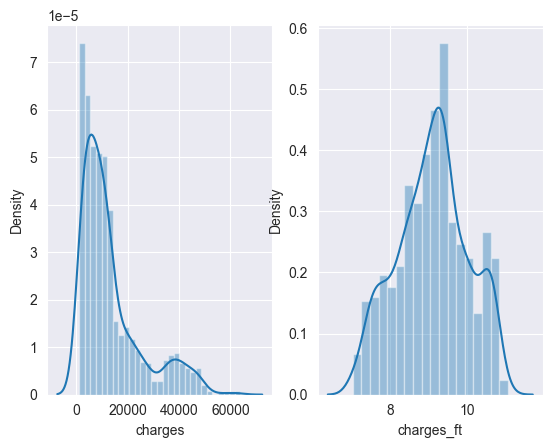

In [161]:
plt.subplot(1,2,1)
sns.distplot(dataset1["charges"])
plt.subplot(1,2,2)
sns.distplot(dataset1["charges_ft"])
plt.show()